In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import pickle

In [4]:
df = pd.read_csv('../Data-processed/crop_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,Soil Moisture,label
0,94,35,35,20.879744,82.002744,6.502985,202.935536,rice
1,65,47,41,21.770462,80.319644,7.038096,226.655537,rice
2,91,48,35,23.004459,82.320763,7.840207,263.964248,rice
3,73,42,44,26.491096,80.158363,6.980401,242.864034,rice
4,63,57,36,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,Soil Moisture,label
2195,99,27,29,26.774637,66.413269,6.780064,177.774507,coffee
2196,91,18,30,27.417112,56.636362,6.086922,127.924610,coffee
2197,91,37,26,24.131797,67.225123,6.362608,173.322839,coffee
2198,106,16,31,26.272418,52.127394,6.758793,127.175293,coffee
2199,97,40,31,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
df.size

17600

In [8]:
df.shape

(2200, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'Soil Moisture',
       'label'],
      dtype='object')

In [10]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [11]:
df.dtypes

N                  int64
P                  int64
K                  int64
temperature      float64
humidity         float64
ph               float64
Soil Moisture    float64
label             object
dtype: object

In [12]:
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

<AxesSubplot:>

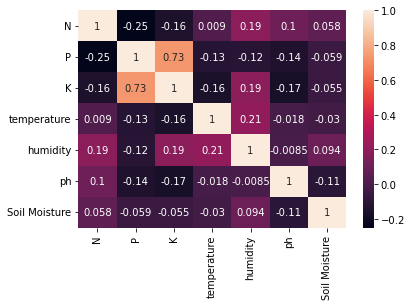

In [13]:
sns.heatmap(df.corr(),annot=True)

<h3>Seperating features and target label</h3>

In [14]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'Soil Moisture']]
target = df['label']

In [15]:
#accuracy and model name
acc = []
model = []

In [16]:
# Splitting into train and test data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

<h2>Decision tree</h2>

In [17]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Decision Tree')         #model name
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       0.93      1.00      0.96        13
      banana       1.00      1.00      1.00        17
   blackgram       0.64      1.00      0.78        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      0.73      0.84        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.21      0.35        28
 kidneybeans       1.00      0.79      0.88        14
      lentil       1.00      0.96      0.98        23
       maize       0.69      0.95      0.80        21
       mango       1.00      0.92      0.96        26
   mothbeans       0.92      0.58      0.71        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

In [18]:
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.925     , 0.90454545, 0.91363636, 0.91818182, 0.92954545])

<b>Saving the trained Decision tree model</b>

In [19]:
DT_pkl = open(r'C:\Users\KMC\Desktop\Final Year Project\Intelligent_CropPrediction_System-main\Saved-Models\DecisionTree.pkl', 'wb')
pickle.dump(DecisionTree, DT_pkl)
DT_pkl.close()

<h2>Guassian Naive Bayes</h2>

In [20]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('Naive Bayes')           #model name
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [21]:
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99545455, 0.99545455, 0.99090909, 0.98636364, 0.99090909])

<b>Saving the trained Naive Bayes model</b>

In [22]:
NB_pkl = open(r'C:\Users\KMC\Desktop\Final Year Project\Intelligent_CropPrediction_System-main\Saved-Models\NaiveBayes.pkl', 'wb')
pickle.dump(NaiveBayes, NB_pkl)
NB_pkl.close()

<h2>Support Vector Machine (SVM)</h2>

In [23]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

SVM = SVC(C=1)
SVM.fit(X_train_norm,Ytrain)
predicted_values = SVM.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('SVM')                   #model name
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      0.94      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.96      0.90        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.92      1.00      0.96        23
       maize       1.00      1.00      1.00        21
       mango       0.96      1.00      0.98        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [24]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.97954545, 0.975     , 0.975     , 0.96818182, 0.975     ])

<b>Saving the trained SVM model</b>

In [25]:
SVM_pkl = open(r'C:\Users\KMC\Desktop\Final Year Project\Intelligent_CropPrediction_System-main\Saved-Models\SVMClassifier.pkl', 'wb')
pickle.dump(SVM, SVM_pkl)
SVM_pkl.close()

<h2>Random Forest</h2>

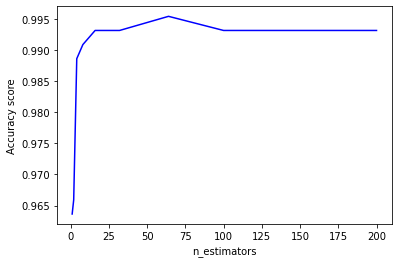

In [26]:
from sklearn.ensemble import RandomForestClassifier
acc_score = []
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
for i in n_estimators:
    RF = RandomForestClassifier(n_estimators=i, random_state=2)
    RF.fit(Xtrain,Ytrain)
    predicted_values = RF.predict(Xtest)

    x = metrics.accuracy_score(Ytest, predicted_values)
    acc_score.append(x) 
    
plt.plot(n_estimators, acc_score, 'b', label='Accuracy')
plt.ylabel('Accuracy score')
plt.xlabel('n_estimators')
plt.show()                      

In [27]:
acc_score

[0.9636363636363636,
 0.9659090909090909,
 0.9886363636363636,
 0.990909090909091,
 0.9931818181818182,
 0.9931818181818182,
 0.9954545454545455,
 0.9931818181818182,
 0.9931818181818182]

In [28]:
RF = RandomForestClassifier(n_estimators=16, random_state=2)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('RF')                   #model name
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00

In [29]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.98863636, 0.98863636, 0.99090909])

<b>Saving the trained Random Forest model</b>

In [30]:
RF_pkl = open(r'C:\Users\KMC\Desktop\Final Year Project\Intelligent_CropPrediction_System-main\Saved-Models\RandomForest.pkl', 'wb')
pickle.dump(RF, RF_pkl)
RF_pkl.close()

<h2>K-Nearest Neighbour</h2>

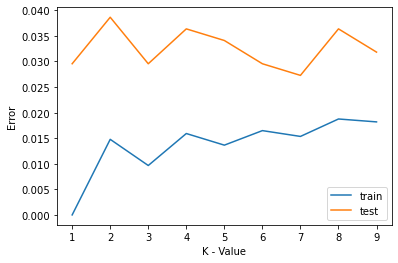

In [31]:
from sklearn.neighbors import KNeighborsClassifier 
error1=[]
error2=[]
for k in range(1,10):
  k_nn = KNeighborsClassifier(n_neighbors=k)
  k_nn.fit(Xtrain,Ytrain)
  y_pred1 = k_nn.predict(Xtrain)
  error1.append(np.mean(Ytrain!=y_pred1))
  y_pred2 = k_nn.predict(Xtest)
  error2.append(np.mean(Ytest!=y_pred2))
plt.plot(range(1,10),error1,label='train')
plt.plot(range(1,10),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

In [32]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(Xtrain)
X_train_norm = norm.transform(Xtrain)
X_test_norm = norm.transform(Xtest)

knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_norm,Ytrain)
predicted_values = knn.predict(X_test_norm)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)                         #accuracy
model.append('KNN')                   #model name
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9659090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.81      0.93      0.87        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      0.96      0.92        23
       maize       1.00      1.00      1.00        21
       mango       0.93      1.00      0.96        26
   mothbeans       1.00      0.74      0.85        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

In [33]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.98863636, 0.98863636, 0.99090909])

<b>Saving the trained Random Forest model</b>

In [34]:
KNN_pkl = open(r'C:\Users\KMC\Desktop\Final Year Project\Intelligent_CropPrediction_System-main\Saved-Models\KNN.pkl', 'wb')
pickle.dump(knn, KNN_pkl)
KNN_pkl.close()

<h2>Comparing models</h2>

<AxesSubplot:title={'center':'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

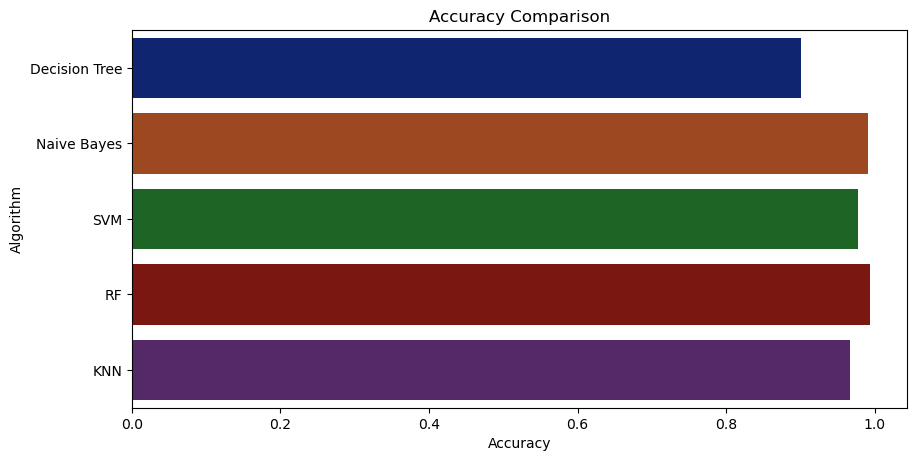

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, '-->', v)

Decision Tree --> 0.9
Naive Bayes --> 0.990909090909091
SVM --> 0.9772727272727273
RF --> 0.9931818181818182
KNN --> 0.9659090909090909


In [ ]:
temp=float(input("Enter the temperature:"))
hum=float(input("Enter the humidity:"))
ph=float(input("Enter the ph value:"))
mois=float(input("Enter the Soil Moisture"))

In [ ]:
#['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'soil moisture']
data = np.array([[57,49,42,temp,hum,ph,mois]])
prediction = RF.predict(data)
print(prediction)